In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

In [2]:
data=pd.read_csv('EastWestAirlines.csv')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


#### Preprocessing 

#### Rename the columns

In [4]:
data.rename(columns={
                    'Award?':'Award'},inplace=True)

In [5]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


#### Remove unwanted column

In [8]:
data.drop('ID#',axis=1,inplace=True)

##### Checking for null values

In [9]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

##### checking for duplicates

In [10]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


#### Removing outliers

In [13]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    ### this will give non outlier values

##### this function removes the outliers

In [14]:
data1 = remove_outliers_iqr(data)
print(f"Original shape: {data.shape}, After removing outliers: {data1.shape}")

Original shape: (3998, 11), After removing outliers: (2875, 11)


In [15]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0


In [16]:
data1.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [17]:
correlation=data1.corr()
correlation

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,NaN,0.459873,NaN,NaN,0.454498,0.357868,0.158129,0.152713,0.235276,0.048744
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,0.459873,NaN,1.000000,NaN,NaN,0.905541,0.629223,0.078735,0.065399,0.180664,0.331700
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,0.454498,NaN,0.905541,NaN,NaN,1.000000,0.619372,0.106674,0.092025,0.155120,0.357000
Bonus_trans,0.357868,NaN,0.629223,NaN,NaN,0.619372,1.000000,0.104181,0.112847,0.132005,0.253727
Flight_miles_12mo,0.158129,NaN,0.078735,NaN,NaN,0.106674,0.104181,1.000000,0.858979,0.033155,0.122003
Flight_trans_12,0.152713,NaN,0.065399,NaN,NaN,0.092025,0.112847,0.858979,1.000000,0.031816,0.132831
Days_since_enroll,0.235276,NaN,0.180664,NaN,NaN,0.155120,0.132005,0.033155,0.031816,1.000000,0.138850


In [18]:
data1.nunique()

Balance              2797
Qual_miles              1
cc1_miles               5
cc2_miles               1
cc3_miles               1
Bonus_miles          1840
Bonus_trans            38
Flight_miles_12mo      57
Flight_trans_12         3
Days_since_enroll    2219
Award                   2
dtype: int64

In [19]:
data.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award                   2
dtype: int64

In [20]:
cr=data.corr()
cr

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


<Axes: >

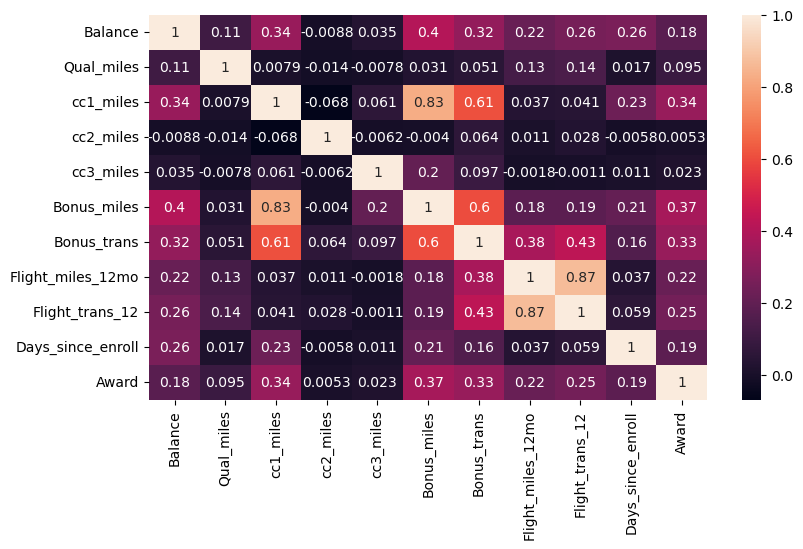

In [21]:
plt.figure(figsize=(9,5))
sns.heatmap(cr,annot=True)

#### Visualization

#### Histograms 

(array([3.623e+03, 2.820e+02, 6.100e+01, 1.300e+01, 1.100e+01, 3.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.   ,  1704.838,  3409.676,  5114.514,  6819.352,  8524.19 ,
        10229.028, 11933.866, 13638.704, 15343.542, 17048.38 ]),
 <BarContainer object of 10 artists>)

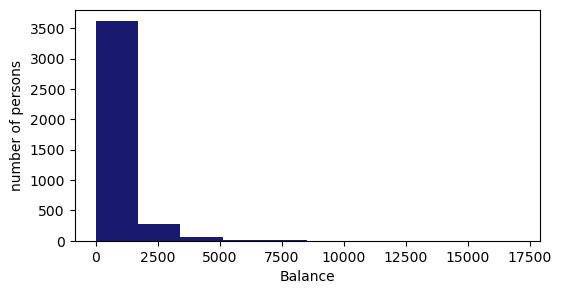

In [22]:
plt.figure(figsize=(6,3))
plt.xlabel('Balance')
plt.ylabel('number of persons')
plt.hist(data['Balance']/100,color='midnightblue',bins=10)

##### Max persons having less than 2500

In [22]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


(array([2288.,    0.,    0.,  284.,    0.,    0.,    0.,  613.,    0.,
           0.,    0.,  525.,    0.,    0.,  288.]),
 array([0.01      , 0.01266667, 0.01533333, 0.018     , 0.02066667,
        0.02333333, 0.026     , 0.02866667, 0.03133333, 0.034     ,
        0.03666667, 0.03933333, 0.042     , 0.04466667, 0.04733333,
        0.05      ]),
 <BarContainer object of 15 artists>)

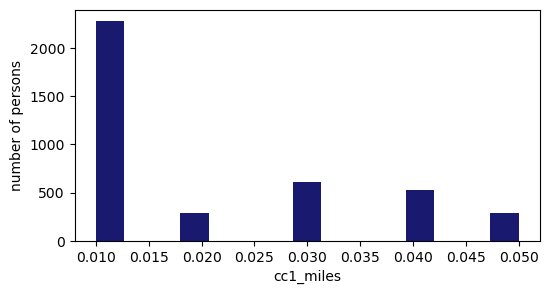

In [23]:
plt.figure(figsize=(6,3))
plt.xlabel('cc1_miles')
plt.ylabel('number of persons')
plt.hist(data['cc1_miles']/100,color='midnightblue',bins=15)

(array([3955.,    0.,    0.,    0.,    0.,   28.,    0.,    0.,    0.,
          15.]),
 array([0.01 , 0.012, 0.014, 0.016, 0.018, 0.02 , 0.022, 0.024, 0.026,
        0.028, 0.03 ]),
 <BarContainer object of 10 artists>)

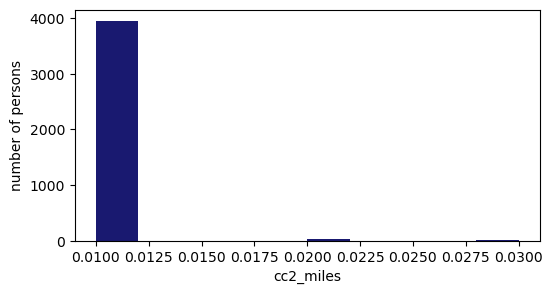

In [24]:
plt.figure(figsize=(6,3))
plt.xlabel('cc2_miles')
plt.ylabel('number of persons')
plt.hist(data['cc2_miles']/100,color='midnightblue',bins=10)

(array([3.98e+03, 0.00e+00, 3.00e+00, 0.00e+00, 0.00e+00, 4.00e+00,
        0.00e+00, 6.00e+00, 0.00e+00, 5.00e+00]),
 array([0.01 , 0.014, 0.018, 0.022, 0.026, 0.03 , 0.034, 0.038, 0.042,
        0.046, 0.05 ]),
 <BarContainer object of 10 artists>)

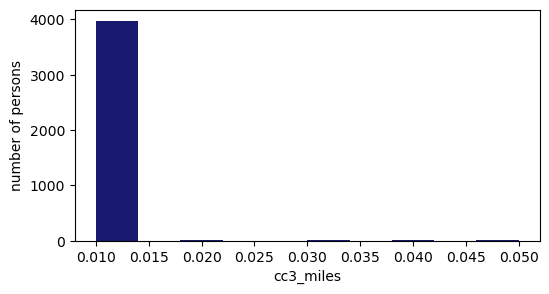

In [25]:
plt.figure(figsize=(6,3))
plt.xlabel('cc3_miles')
plt.ylabel('number of persons')
plt.hist(data['cc3_miles']/100,color='midnightblue',bins=10)

#### Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6dbda0080>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6dbdf6150>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2b6dcc5b8f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6dcc72d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6dcc73020>],
 'means': []}

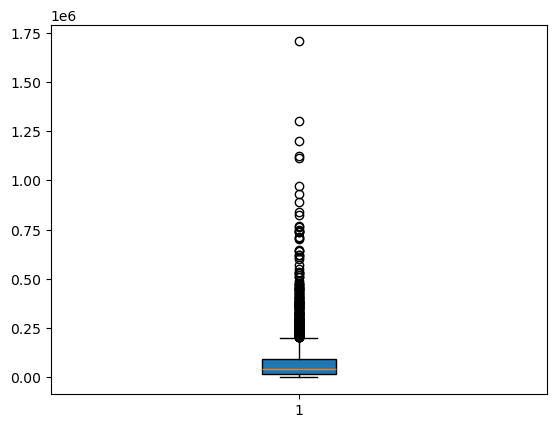

In [26]:
plt.boxplot(data['Balance'],patch_artist=True)

#### Implementing clustering Algorithms

#### KMeans

##### elbow curve after outliers removed

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scale_data=StandardScaler()

In [25]:
scaled_data=scale_data.fit_transform(data1)

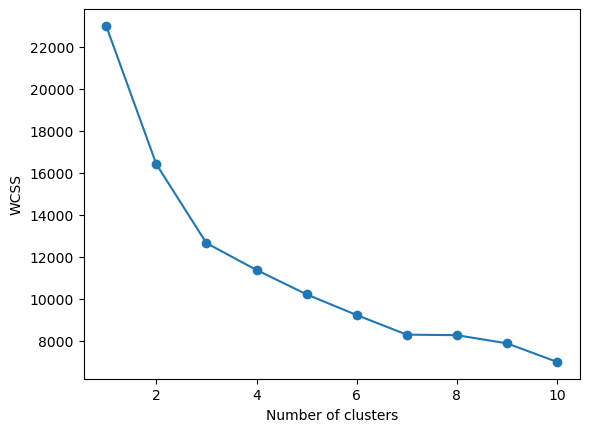

In [26]:
### Elbow curve
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model_or=KMeans(n_clusters=i,random_state=42)
    model_or.fit(scaled_data)
    wcss.append(model_or.inertia_)
### Plot the elbow curve
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##### elbow curve before outliers removed

In [27]:
scaled_data1=scale_data.fit_transform(data)

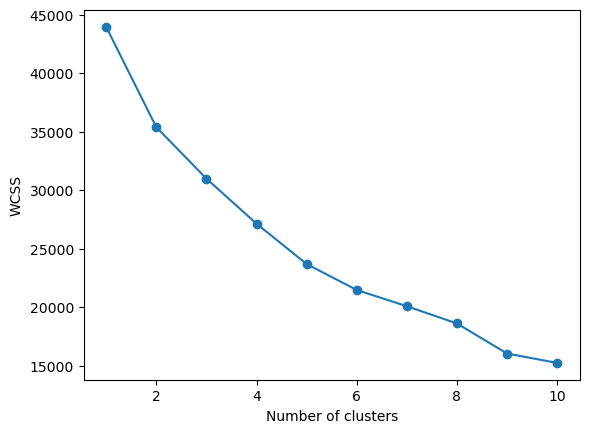

In [28]:
### Elbow curve
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(scaled_data1)
    wcss.append(model.inertia_)
### Plot the elbow curve
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### Heirarchical

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
model_h=AgglomerativeClustering(n_clusters=3,linkage='ward')
model_h.fit(data)
heirarchical_labels=model_h.labels_

##### Before outliers removed

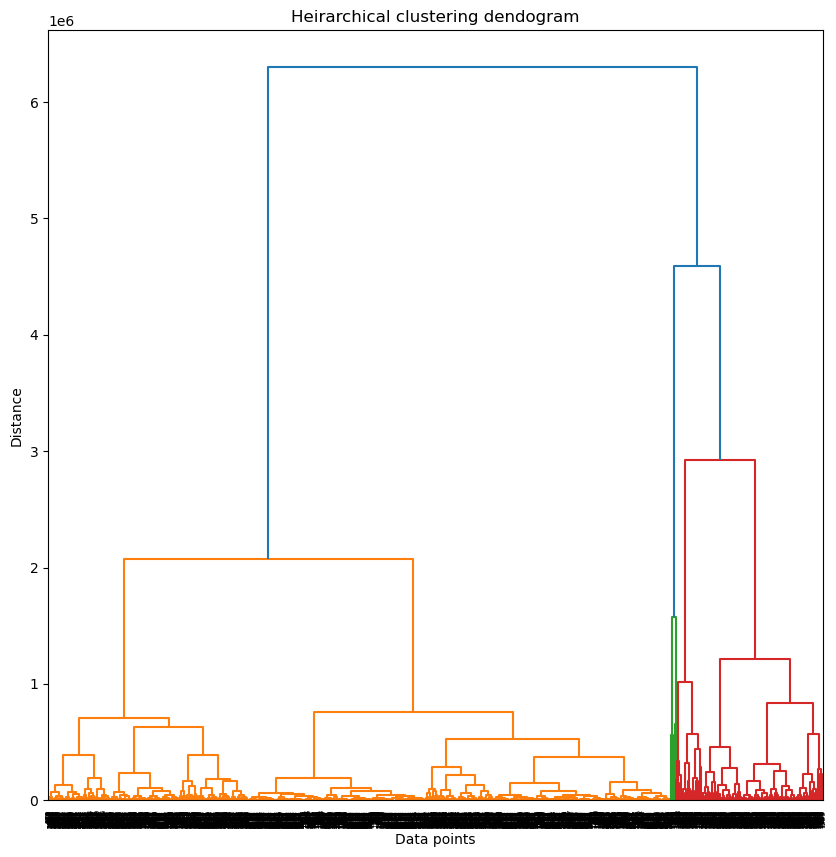

In [31]:
### Dendograms
from scipy.cluster.hierarchy import dendrogram,linkage
linkage_matrix=linkage(data,method='ward')
plt.figure(figsize=(10,10))
dendrogram(linkage_matrix)
plt.title('Heirarchical clustering dendogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

##### after extreme values removed

In [32]:
model2=AgglomerativeClustering(n_clusters=3,linkage='ward')
model2.fit(scaled_data)
heirarchical_labels=model2.labels_
heirarchical_labels

array([1, 1, 1, ..., 0, 2, 1], dtype=int64)

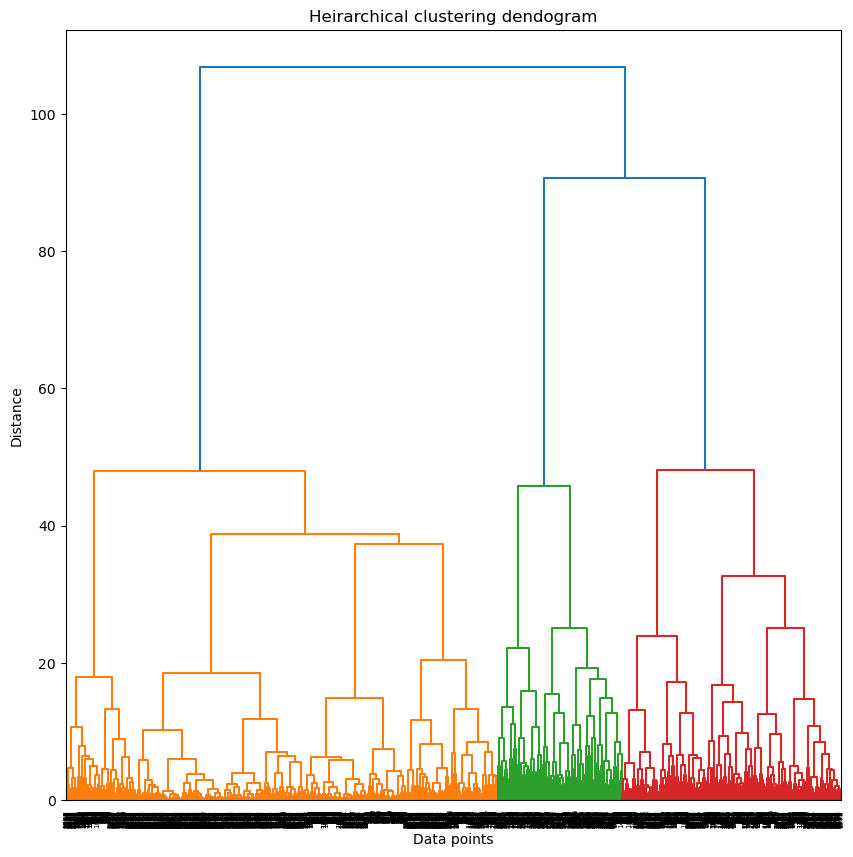

In [33]:
### Dendograms
from scipy.cluster.hierarchy import dendrogram,linkage
linkage_matrix=linkage(scaled_data,method='ward')
plt.figure(figsize=(10,10))
dendrogram(linkage_matrix)
plt.title('Heirarchical clustering dendogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

#### DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
## For normal data
model3=DBSCAN(eps=0.5,min_samples=5) ## adjust parameters as needed
model3.fit(data)

DBSCAN()

In [36]:
DBSCAN_labels=model3.labels_

In [37]:
## For outliers removed data data
model4=DBSCAN(eps=0.5,min_samples=5) ## adjust parameters as needed
model4.fit(scaled_data)

DBSCAN()

In [38]:
DBSCAN_labels1=model4.labels_

#### Cluster Analysis and Interpretation:
Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments

#### K-Means: 
Cluster 1 might represent high-income customers who frequently purchase luxury items, while Cluster 2 might represent budget-conscious customers who prefer value-oriented products.
#### Hierarchical Clustering: 
A dendrogram might reveal a hierarchical structure where certain customer segments are closely related, suggesting potential sub-segments within broader customer groups.
#### DBSCAN: 
DBSCAN might identify a dense cluster of loyal customers and a few outlier customers with unique purchasing behavior.

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(scaled_data) 
data1['KMeans_labels'] = kmeans.labels_

# Calculate cluster means
cluster_means = data1.groupby('KMeans_labels').mean() 

# Print cluster means
print(cluster_means) 

                    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_labels                                                              
0              28635.022630         0.0   1.070336        1.0        1.0   
1              65332.950139         0.0   2.066482        1.0        1.0   
2              73133.163823         0.0   3.150171        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_labels                                                                  
0               2639.345566     5.316820           4.262385         0.035474   
1              14537.329640    11.789474         422.994460         1.301939   
2              24748.590444    15.982935           5.062571         0.048919   

               Days_since_enroll     Award  
KMeans_labels                               
0                    3553.131498  0.132722  
1                    4098.351801  0.443213  
2                    4558.370876  0.48

In [41]:
data1['Hierarchical_labels'] = model2.labels_ 

cluster_means = data1.groupby('Hierarchical_labels').mean() 

print(cluster_means) 

                          Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_labels                                                   
0                    79391.128237         0.0   3.150432        1.0   
1                    26096.665627         0.0   1.103556        1.0   
2                    61753.466377         0.0   2.041215        1.0   

                     cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_labels                                                            
0                          1.0  24663.082614    15.123305           0.061652   
1                          1.0   2960.149719     5.910168           0.000000   
2                          1.0  14252.574837    11.407809         355.900217   

                     Flight_trans_12  Days_since_enroll     Award  \
Hierarchical_labels                                                 
0                           0.001233        4484.448829  0.426634   
1                           0.000000

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan.fit(scaled_data) 
data1['DBSCAN_labels'] = dbscan.labels_ 

noise_points = data1[data1['DBSCAN_labels'] == -1]
cluster_means = data1[data1['DBSCAN_labels'] != -1].groupby('DBSCAN_labels').mean() 
print(cluster_means) 

                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_labels                                                               
0               22788.683277         0.0        1.0        1.0        1.0   
1               23661.471429         0.0        1.0        1.0        1.0   
2               69571.378882         0.0        3.0        1.0        1.0   
3                9765.200000         0.0        2.0        1.0        1.0   
4               23862.890244         0.0        3.0        1.0        1.0   
5               42635.468750         0.0        2.0        1.0        1.0   
6               81318.750000         0.0        4.0        1.0        1.0   
7              138596.200000         0.0        4.0        1.0        1.0   
8              112333.200000         0.0        2.0        1.0        1.0   
9               20948.000000         0.0        2.0        1.0        1.0   
10              99450.800000         0.0        4.0        1.0        1.0   

#### Visualization

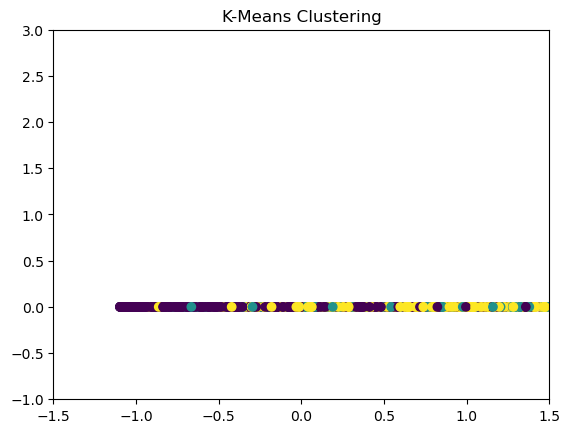

In [43]:
# Visualize clusters (example with two features)
plt.scatter(scaled_data[:, 0],scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlim(-1.5, 1.5)
plt.ylim(-1,3)
plt.show()

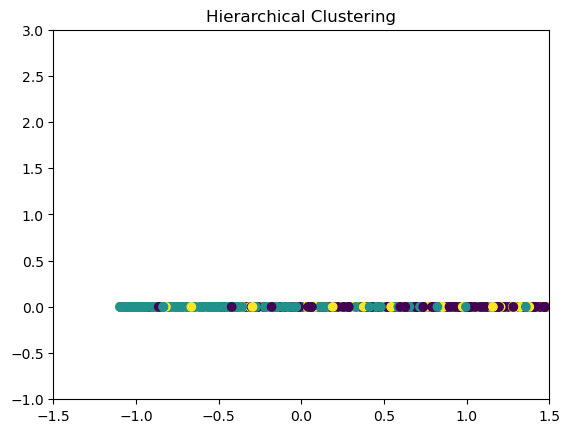

In [44]:
plt.scatter(scaled_data[:, 0],scaled_data[:, 1], c=model2.labels_, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlim(-1.5, 1.5)
plt.ylim(-1,3)
plt.show() 

ValueError: 'c' argument has 2875 elements, which is inconsistent with 'x' and 'y' with size 3998.

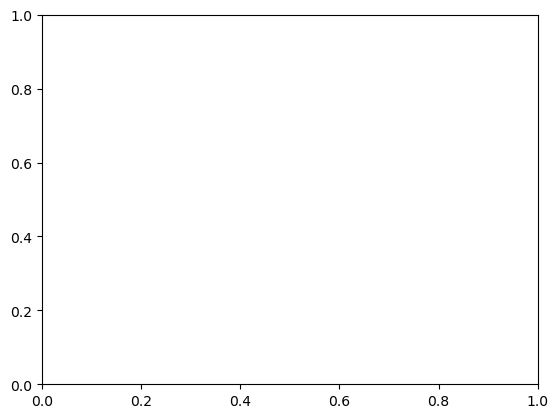

In [45]:
# Visualize clusters (example with two features)
plt.scatter(scaled_data1[:, 0], scaled_data1[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlim(-1.5, 1.5)
plt.ylim(-1,3)
plt.show() 